## Problem

- Online Retailer Customer Segmentation and Analysis
- We are going to perform an exploratory data analysis for an online retail store data set, in order to understand its customers.
- How can I scale my current business that is doing really well, in the most effective way?

## Data

https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv

## Eval

- Monthly Revenue Overview
- Monthly Items Sold Overview
- Monthly Active Customers
- Average Revenue per Month
- New vs Existing Users

## Features

[InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'InvoiceMonth', 'InvoiceYear']

In [1]:
%%time
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the available data and overview
df=pd.read_csv("https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv", encoding="ISO-8859-1",low_memory=False)
df.head()

Wall time: 26.1 s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.to_csv('dataonline.csv', index=False)

In [73]:
df = pd.read_csv('dataonline.csv')

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
! pip install -U pandas-profiling[notebook]

In [6]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [75]:
# Look for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [77]:
# Add Revenue variable and update InvoiceDate 
df["Revenue"]=df["UnitPrice"]*df["Quantity"]
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df["InvoiceMonth"]=pd.DatetimeIndex(df["InvoiceDate"]).month
df["InvoiceYear"]=pd.DatetimeIndex(df["InvoiceDate"]).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   Revenue       541909 non-null  float64       
 9   InvoiceMonth  541909 non-null  int64         
 10  InvoiceYear   541909 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 45.5+ MB


In [79]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,7.553128,2010.921609
std,218.081158,96.759853,1713.600303,378.810824,3.509055,0.268787
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,3.400000,5.000000,2011.000000
50%,3.000000,2.080000,15152.000000,9.750000,8.000000,2011.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


# Monthly Revenue Overview

###### Get the years represented in the dataset.

In [80]:
df["InvoiceYear"].value_counts()

2011    499428
2010     42481
Name: InvoiceYear, dtype: int64

In [81]:
y_2010 = df[df["InvoiceYear"]== 2010]
y_2010['InvoiceMonth'].value_counts()

12    42481
Name: InvoiceMonth, dtype: int64

In [82]:
y_2011 = df[df["InvoiceYear"]== 2011]
y_2011['InvoiceMonth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [83]:
#Monthly Revenue Overview
df_revenue = df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
df_revenue.head()

,InvoiceMonth,InvoiceYear,Revenue
0,1,2011,560000.260
1,2,2011,498062.650
2,3,2011,683267.080
3,4,2011,493207.121
4,5,2011,723333.510


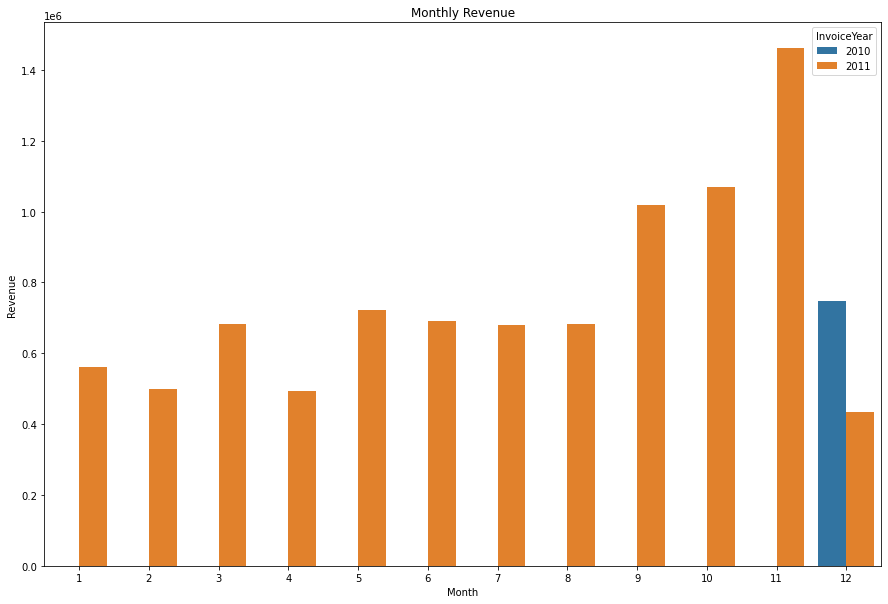

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

- From the barplot, we notice that the sales revenue plummets around December 2011 to a new low. 
- We can investigate why this to get deeper insight as to what is causing this occurence.
- To do this, lets select the data for December 2011 only.

In [85]:
# Look at the December 2011 data
df_december_2011 = df.query("InvoiceMonth==12 and InvoiceYear==2011")
df_december_2011['InvoiceDay'] = df_december_2011['InvoiceDate'].dt.day

<ipython-input-85-906c9e484953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_december_2011['InvoiceDay'] = df_december_2011['InvoiceDate'].dt.day


In [86]:
df_december_2011.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,InvoiceDay
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011,9
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,12,2011,9


In [87]:
df_december_2011['InvoiceDay'].value_counts()

5    5331
8    4940
6    3365
1    2901
2    2880
7    2438
4    2038
9    1632
Name: InvoiceDay, dtype: int64

- Now we can conclude that the reason why there was very low sales in Dec 2011 could be because we have data only up to 9th December.
- Maybe we can go back and fetch the data for the remaining days.
- On a separate note; we can see that the revenue grows steadily starting from September 2011 all the way up to December 2011, November being the best month in terms of revenue.
- This could be attributed to the festive season in December.

# Monthly Items Sold Overview

In [88]:
# Monthly Items Sold Overview
df_quantity=df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
df_quantity.head()

,InvoiceMonth,InvoiceYear,Quantity
0,1,2011,308966
1,2,2011,277989
2,3,2011,351872
3,4,2011,289098
4,5,2011,380391


Text(0, 0.5, 'Items Sold')

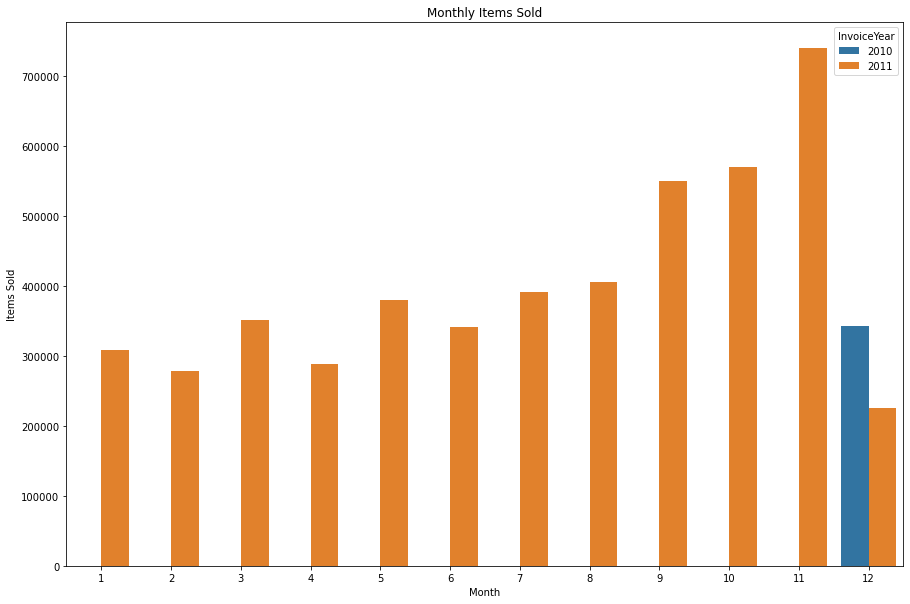

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", hue="InvoiceYear",data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")

# Monthly Active Customers

In [90]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
df_active.head()

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079


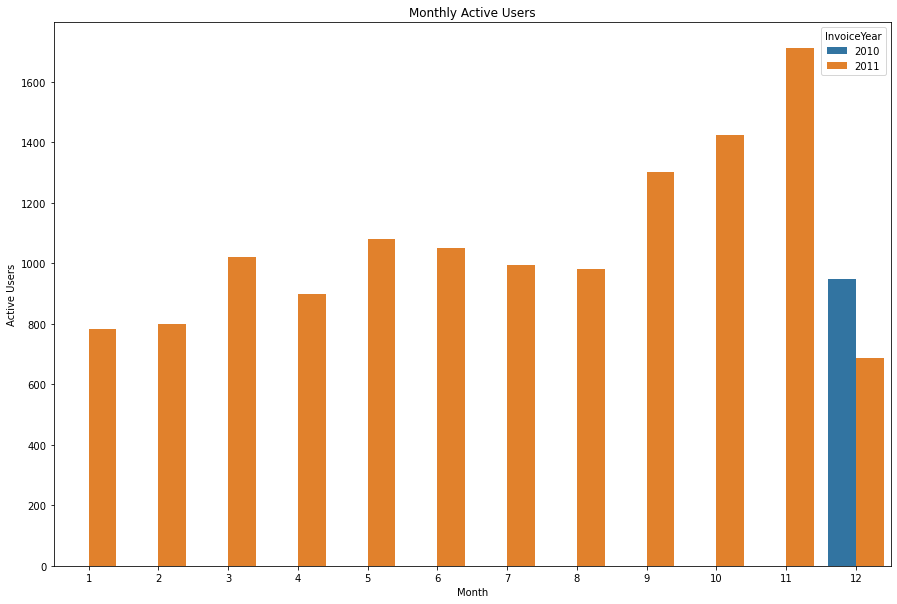

In [91]:
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")
plt.show()

- The number of unique customers increased sharply towards the end of the year 2011.
- But in general the number of unique customers increased throughout the year.

In [92]:
df_active_2011 = df_active[df_active['InvoiceYear'] == 2011]
df_active_2011

,InvoiceMonth,InvoiceYear,CustomerID
0,1,2011,783
1,2,2011,798
2,3,2011,1020
3,4,2011,899
4,5,2011,1079
5,6,2011,1051
6,7,2011,993
7,8,2011,980
8,9,2011,1302
9,10,2011,1425


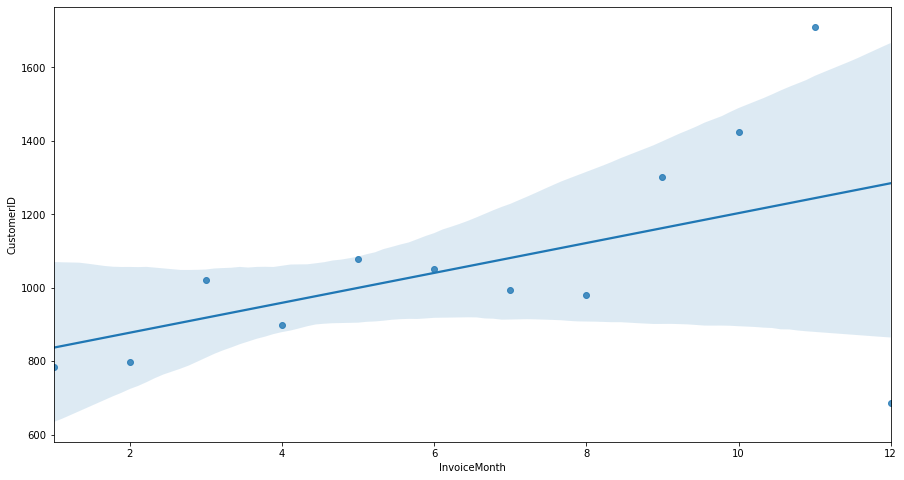

In [93]:
plt.figure(figsize=(15,8))
sns.regplot(x="InvoiceMonth", y="CustomerID", data=df_active_2011)
plt.show()

- The line of best fit indicate that generally the number of unique customers increased throughout the year.

# New vs Existing Users

In [94]:
# New vs Existing Users
df_first_purchase=df.groupby(["CustomerID"])["InvoiceDate"].min().reset_index()
df_first_purchase.columns=["CustomerID", "FirstPurchaseDate"]
df=pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"]="New"
df.loc[df["InvoiceDate"] > df["FirstPurchaseDate"], "UserType"]="Existing"



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,FirstPurchaseDate,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12-01 08:26:00,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2010-12-01 08:26:00,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New


In [98]:
df[df['UserType'] == 'Existing']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,FirstPurchaseDate,UserType
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
9,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
10,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10,12,2010,2010-12-01 08:26:00,Existing
11,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12-01 08:26:00,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406621,581125,21680,WOODLAND STICKERS,6,2011-12-07 12:41:00,0.85,14087.0,United Kingdom,5.10,12,2011,2011-12-07 12:28:00,Existing
406622,581125,16216,LETTER SHAPE PENCIL SHARPENER,25,2011-12-07 12:41:00,0.06,14087.0,United Kingdom,1.50,12,2011,2011-12-07 12:28:00,Existing
406623,581125,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,1.65,12,2011,2011-12-07 12:28:00,Existing
406624,581125,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,6,2011-12-07 12:41:00,1.65,14087.0,United Kingdom,9.90,12,2011,2011-12-07 12:28:00,Existing


<Figure size 432x288 with 0 Axes>

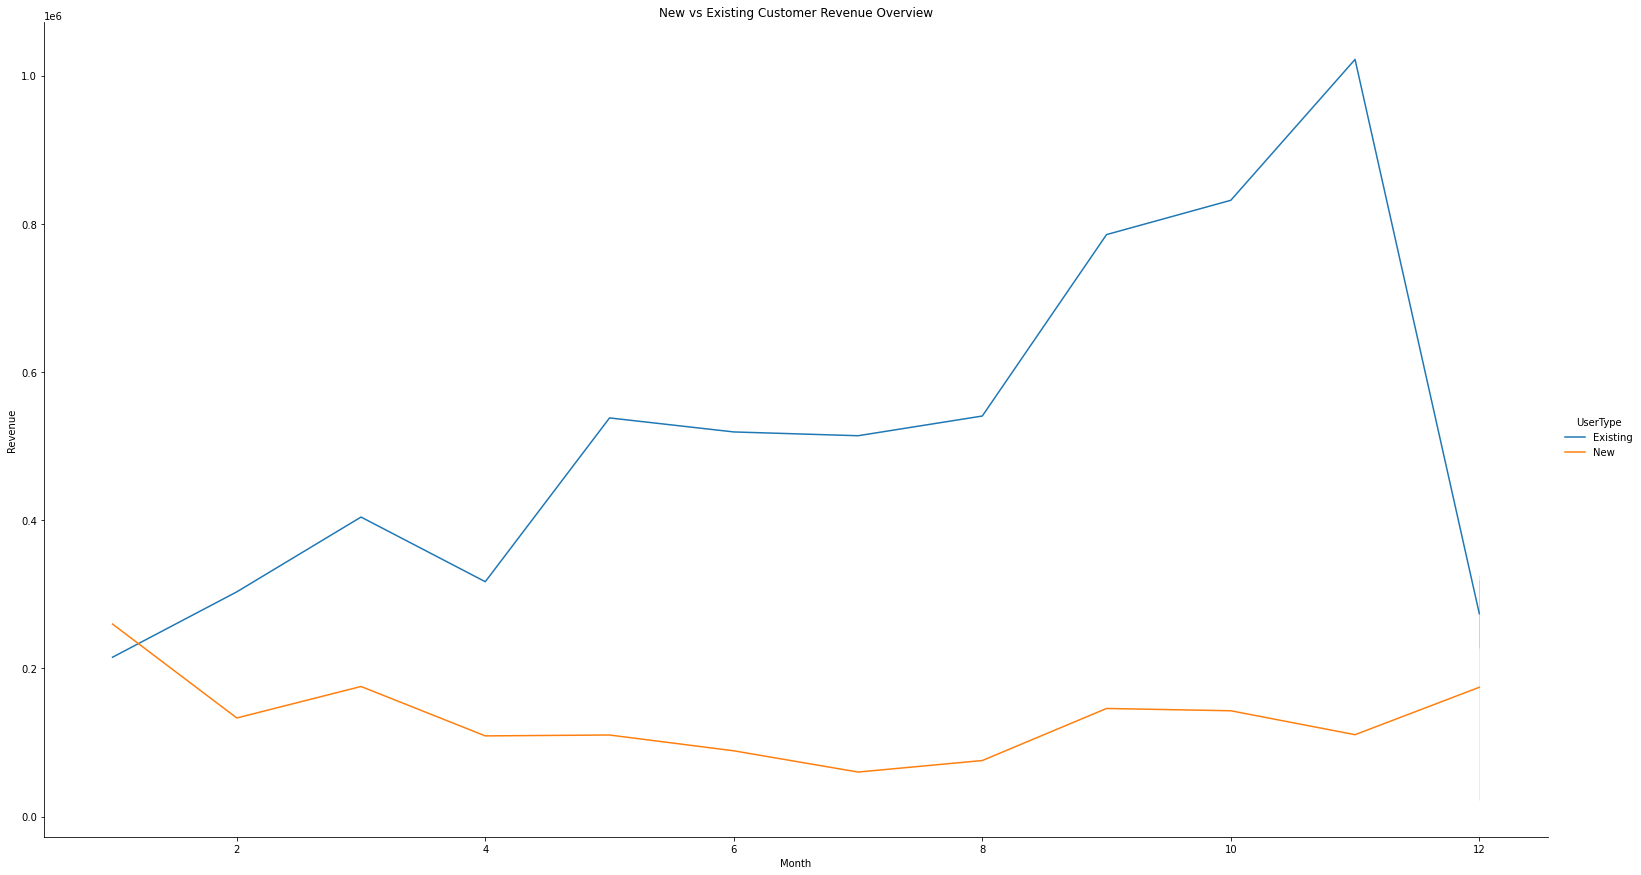

In [99]:
# New vs Existing User Revenue Analysis
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue, kind="line", height=12, aspect=18/10)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

# Frequency of Orders

In [103]:
df_user=pd.DataFrame(df["CustomerID"].unique())
df_user.columns=["CustomerID"]
df_user

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
...,...
4367,13436.0
4368,15520.0
4369,13298.0
4370,14569.0


In [106]:
# frequency of orders
df_frequency=df.groupby(["CustomerID"])["InvoiceDate"].count().reset_index()
df_frequency.columns=["CustomerID", "Frequency"]
df_frequency=pd.merge(df_user, df_frequency, on="CustomerID")
df_frequency.head()

,CustomerID,Frequency
0,17850.0,312
1,13047.0,196
2,12583.0,251
3,13748.0,28
4,15100.0,6


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


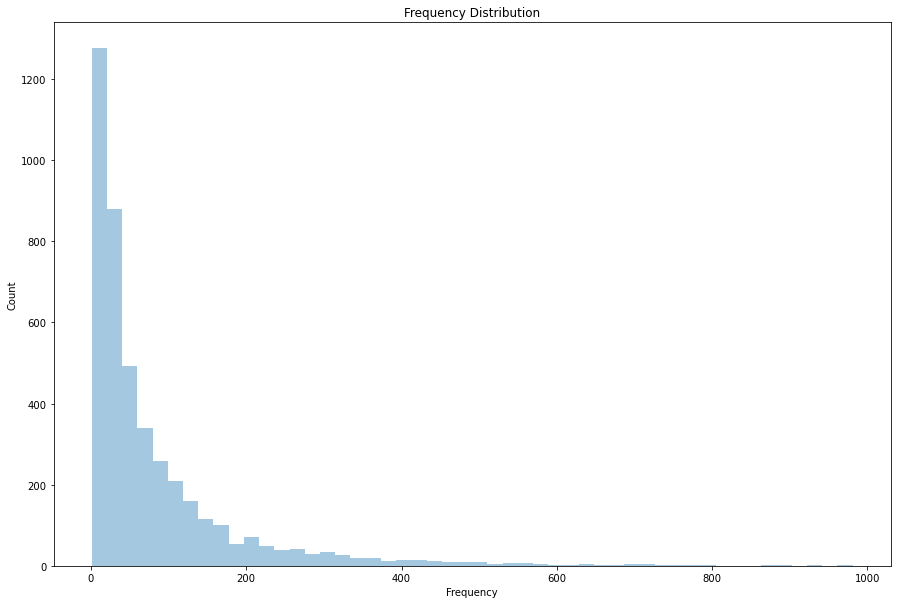

In [108]:
# Review of Frequency Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_frequency.query("Frequency<1000")["Frequency"], kde=False)
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

In [114]:
def revenue_analysis(df):
    countries = df['Country'].unique()
    for country in countries:
        df_country = df[df['Country'] == country]
        df_rev = df_country['Revenue'].sum()
        print(f'{country}, {df_rev}')
revenue_analysis(df)

United Kingdom, 6767873.394000002
France, 196712.84
Australia, 137077.27000000002
Belgium, 40910.96
Netherlands, 284661.54
Germany, 221698.21000000002
Norway, 35163.46
EIRE, 250285.21999999997
Switzerland, 55739.4
Spain, 54774.58
Poland, 7213.139999999999
Portugal, 29059.809999999998
Italy, 16890.510000000002
Lithuania, 1661.06
Japan, 35340.62000000001
Iceland, 4310.000000000001
Channel Islands, 20086.29
Denmark, 18768.14
Austria, 10154.32
Cyprus, 12946.29
Sweden, 36595.91
Israel, 6994.25
Finland, 22326.739999999998
Greece, 4710.5199999999995
Singapore, 9120.39
Lebanon, 1693.88
United Arab Emirates, 1902.2800000000002
Saudi Arabia, 131.17000000000002
Czech Republic, 707.7200000000001
Canada, 3666.38
Unspecified, 2667.0700000000006
Brazil, 1143.6
USA, 1730.92
European Community, 1291.75
Bahrain, 548.4
Malta, 2505.4700000000003
RSA, 1002.3100000000001
